# =====================================
# Customer Segmentation using Clustering
# Author: Syed Huzaifa Bin Khamis
# Internship: Elevvo Pathways (Cairo, Egypt)
# =====================================

In [1]:
# ----- Import Required Libraries -----
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

In [2]:
# ----- Step 1: Load Dataset -----
df = pd.read_csv("Mall_Customers.csv")

print("Dataset Loaded Successfully!\n")
print(df.head())

Dataset Loaded Successfully!

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [3]:
# ----- Step 2: Explore & Clean Data -----
print("\nDataset Info:\n")
print(df.info())

print("\nMissing Values:\n", df.isnull().sum())

# Rename columns for easy access (optional)
df.columns = [col.strip().replace(" ", "_").lower() for col in df.columns]

# We will use 'annual_income_(k$)' and 'spending_score_(1-100)'
df.rename(columns={
    'annual_income_(k$)': 'annual_income',
    'spending_score_(1-100)': 'spending_score'
}, inplace=True)


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Missing Values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


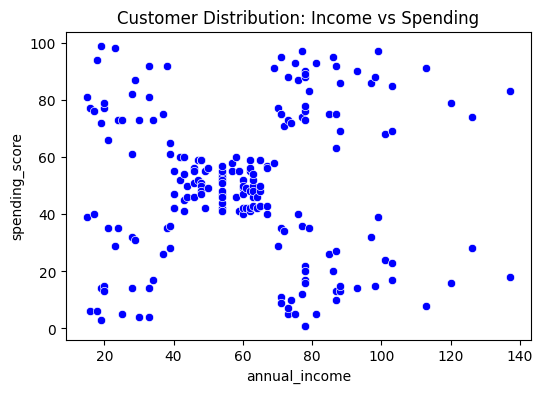

In [4]:
# ----- Step 3: Basic Visualization -----
plt.figure(figsize=(6,4))
sns.scatterplot(x='annual_income', y='spending_score', data=df, color='blue')
plt.title("Customer Distribution: Income vs Spending")
plt.show()

In [5]:
# ----- Step 4: Select Features for Clustering -----
X = df[['annual_income', 'spending_score']]

In [6]:
# ----- Step 5: Feature Scaling -----
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

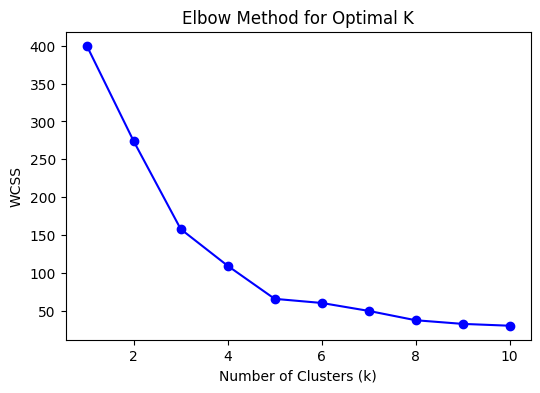

In [7]:
# ----- Step 6: Find Optimal Number of Clusters (Elbow Method) -----
wcss = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, wcss, 'bo-')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.show()

In [8]:
# ----- Step 7: Silhouette Score for Validation -----
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"Silhouette Score for k={k}: {score:.3f}")

# Choose best k (visually or from silhouette) — commonly 5
optimal_k = 5

Silhouette Score for k=2: 0.397
Silhouette Score for k=3: 0.467
Silhouette Score for k=4: 0.494
Silhouette Score for k=5: 0.555
Silhouette Score for k=6: 0.514


In [10]:
# ----- Step 8: Apply K-Means -----
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

print("\n Clustering Completed. Cluster Centers:")
print(kmeans.cluster_centers_)


 Clustering Completed. Cluster Centers:
[[-0.20091257 -0.02645617]
 [ 0.99158305  1.23950275]
 [-1.32954532  1.13217788]
 [ 1.05500302 -1.28443907]
 [-1.30751869 -1.13696536]]


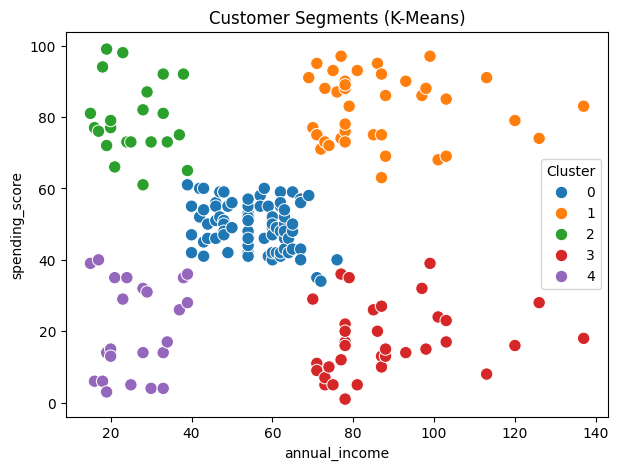

In [11]:
# ----- Step 9: Visualize Clusters -----
plt.figure(figsize=(7,5))
sns.scatterplot(
    x='annual_income',
    y='spending_score',
    hue='cluster',
    palette='tab10',
    data=df,
    s=80
)
plt.title("Customer Segments (K-Means)")
plt.legend(title='Cluster')
plt.show()


 Average Spending & Income per Cluster:
         annual_income  spending_score
cluster                               
0            55.296296       49.518519
1            86.538462       82.128205
2            25.727273       79.363636
3            88.200000       17.114286
4            26.304348       20.913043


<Figure size 600x400 with 0 Axes>

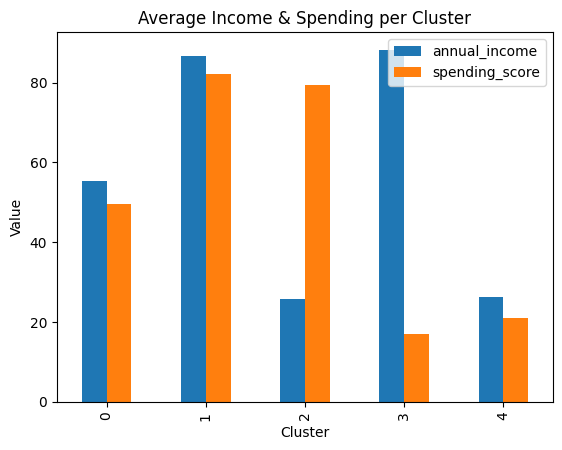

In [12]:
# ----- Step 10: Analyze Average Spending per Cluster -----
avg_stats = df.groupby('cluster')[['annual_income', 'spending_score']].mean()
print("\n Average Spending & Income per Cluster:")
print(avg_stats)

plt.figure(figsize=(6,4))
avg_stats.plot(kind='bar')
plt.title("Average Income & Spending per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Value")
plt.show()

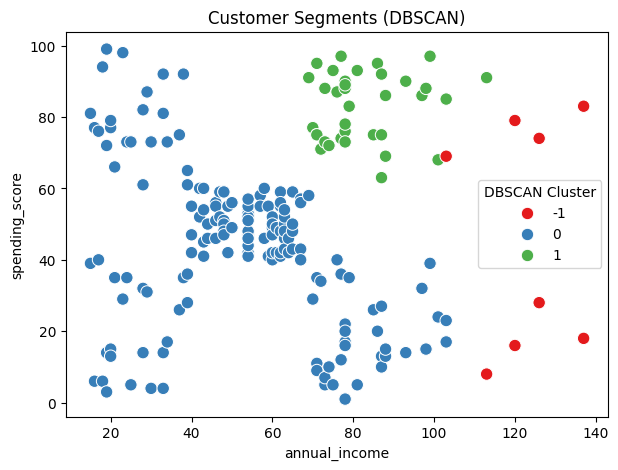

In [13]:
# ======================================================
# BONUS PART 1: DBSCAN
# ======================================================

dbscan = DBSCAN(eps=0.5, min_samples=5)
df['dbscan_cluster'] = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(7,5))
sns.scatterplot(
    x='annual_income',
    y='spending_score',
    hue='dbscan_cluster',
    palette='Set1',
    data=df,
    s=80
)
plt.title("Customer Segments (DBSCAN)")
plt.legend(title='DBSCAN Cluster')
plt.show()

In [15]:
# ======================================================
# BONUS PART 2: Cluster Insights
# ======================================================
print("\nCluster Summary (K-Means):")
for c in df['cluster'].unique():
    cluster_data = df[df['cluster'] == c]
    print(f"\nCluster {c}:")
    print(f"Count: {len(cluster_data)}")
    print(f"Avg Income: {cluster_data['annual_income'].mean():.2f}k$")
    print(f"Avg Spending: {cluster_data['spending_score'].mean():.2f}")


Cluster Summary (K-Means):

Cluster 4:
Count: 23
Avg Income: 26.30k$
Avg Spending: 20.91

Cluster 2:
Count: 22
Avg Income: 25.73k$
Avg Spending: 79.36

Cluster 0:
Count: 81
Avg Income: 55.30k$
Avg Spending: 49.52

Cluster 1:
Count: 39
Avg Income: 86.54k$
Avg Spending: 82.13

Cluster 3:
Count: 35
Avg Income: 88.20k$
Avg Spending: 17.11
